In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# show all columns
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import scatterplotmatrix, heatmap

In [2]:
import utils

In [3]:
# reload th imports
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/sophiechance/Documents/Cal/Github/foster_care_analysis/utils.py'>

In [4]:
cleaned_subset = pd.read_csv('data/cleaned_subset_data.csv')

/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_89486/3299079667.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_subset = pd.read_csv('data/cleaned_subset_data.csv')


# One hot encoding

In [5]:
cleaned_subset.head()

,DataYear,RecNumbr,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,State,FIPSCode,Sex,AgeAdopt,removalManner,currentPlacementSetting,OutOfStatePlacement,caseGoal,caretakerFamilyStructure,fosterFamilyStructure,dischargeReason,raceEthnicity,everAdopted,diagnosedDisability,age2021
0,2001,5085,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,241.0,3077.0,0.0,6727.0,18.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, relative",No,Long-term foster care,Unable to determine,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",Not yet determined,40.0
1,2001,7376,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,205.0,5527.0,0.0,7054.0,18.0,0.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Married couple,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",Not yet determined,39.0
2,2001,8421,0.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,6788.0,19.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,DNG,No,Long-term foster care,Single female,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",Not yet determined,41.0
3,2001,9877,0.0,0.0,0.0,1.0,1.0,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,241.0,658.0,511.0,6011.0,17.0,2.0,18.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Unmarried couple,Not applicable,Living with other relative(s),"Non-Hispanic (NH), White","No, has never been legally adopted",Yes,38.0
4,2001,12543,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,241.0,5999.0,398.0,6894.0,20.0,3.0,21.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Married couple,Married couple,Emancipation,"Non-Hispanic (NH), White","No, has never been legally adopted",Yes,41.0


In [6]:
cleaned_subset.drop(columns = [
    'DataYear', # only 2001 for now + shouldn't be used for prediction
    'RecNumbr', # was Encoding this column which is a problem
], inplace = True)

In [7]:
ml_df = pd.get_dummies(cleaned_subset, drop_first=True)

In [8]:
ml_df.head()

,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,age2021,State_Arizona,State_Arkansas,State_Colorado,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Kentucky,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Mississippi,State_Missouri,State_Nebraska,State_New Hampshire,State_New Jersey,State_New Mexico,State_North Carolina,State_North Dakota,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Puerto Rico,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_West Virginia,State_Wisconsin,State_Wyoming,"FIPSCode_Allegheny, PA","FIPSCode_Allen, IN","FIPSCode_Arapahoe, CO","FIPSCode_Baltimore City, MD","FIPSCode_Bexar, TX","FIPSCode_Brevard, FL","FIPSCode_Bristol, MA","FIPSCode_Broward, FL","FIPSCode_Camden, NJ","FIPSCode_Cook, IL",FIPSCode_DNG,"FIPSCode_Dallas, TX","FIPSCode_Davidson, TN","FIPSCode_De Kalb, GA","FIPSCode_Denver, CO",FIPSCode_District of Columbia,"FIPSCode_Douglas, NE","FIPSCode_Duval, FL","FIPSCode_El Paso, CO","FIPSCode_Escambia, FL","FIPSCode_Essex, MA","FIPSCode_Essex, NJ",FIPSCode_Fewer than 1000 cases in the County,"FIPSCode_Fulton, GA","FIPSCode_Genesee, MI","FIPSCode_Greene, MO","FIPSCode_Hampden, MA","FIPSCode_Harris, TX","FIPSCode_Hillsborough, FL","FIPSCode_Honolulu, HI","FIPSCode_Hudson, NJ","FIPSCode_Ingham, MI","FIPSCode_Jackson, MO","FIPSCode_Jefferson, AL","FIPSCode_Jefferson, CO","FIPSCode_Jefferson, KY","FIPSCode_Kent, MI","FIPSCode_Lake, IN","FIPSCode_Lancaster, NE","FIPSCode_Lane, OR","FIPSCode_Lee, FL","FIPSCode_Macomb, MI","FIPSCode_Maricopa, AZ","FIPSCode_Marion, IN","FIPSCode_Marion, OR","FIPSCode_Mecklenburg, NC","FIPSCode_Miami-Dade, FL","FIPSCode_Middlesex, MA","FIPSCode_Milwaukee, WI","FIPSCode_Multnomah, OR","FIPSCode_Oakland, MI","FIPSCode_Oklahoma, OK","FIPSCode_Orange, FL","FIPSCode_Palm Beach, FL","FIPSCode_Peoria, IL","FIPSCode_Philadelphia, PA","FIPSCode_Pima, AZ","FIPSCode_Pinellas, FL","FIPSCode_Polk, FL","FIPSCode_Providence, RI","FIPSCode_Salt Lake, UT","FIPSCode_San Juan, PR","FIPSCode_Shelby, TN","FIPSCode_St. Louis City, MO","FIPSCode_St. Louis, MO","FIPSCode_Suffolk, MA","FIPSCode_Tarrant, TX","FIPSCode_Travis, TX","FIPSCode_Tulsa, OK","FIPSCode_Union, NJ","FIPSCode_Volusia, FL","FIPSCode_Wayne, MI","FIPSCode_Worcester, MA","FIPSCode_York, PA",Sex_Female,Sex_Male,AgeAdopt_2-5 years old,AgeAdopt_6-12 years old,AgeAdopt_Less than 2 years old,AgeAdopt_Not applicable,AgeAdopt_Unable to determine,AgeAdopt_Unknown,removalManner_DNG,removalManner_Not yet determined,removalManner_Voluntary,"currentPlacementSetting_Foster home, non-relative","currentPlacementSetting_Foster home, relative",currentPlacementSetting_Group home,currentPlacementSetting_Institution,currentPlacementSetting_Pre-adoptive home,currentPlacementSetting_Runaway,currentPlacementSetting_Supervised independent living,currentPlacementSetting_Trial home visit,OutOfStatePlacement_No,OutOfStatePlacement_Yes,caseGoal_Case plan goal not yet established,caseGoal_DNG,caseGoal_Emancipation,caseGoal_Guardianship,caseGoal_Live with other relative(s),caseGoal_Long-term foster care,"caseGoal_Reunify with parent, principal caretaker",caretakerFamilyStructure_Married couple,caretakerFamilyStructure_Single female,caretakerFamilyStructure_Single male,caretakerFamilyStructure_Unable to determine,caretakerFamilyStructure_Unmarried couple,fosterFamilyStructure_Married couple,fosterFamilyStructure_Not applicable,fosterFamilyStructure_Single female,fosterFamilyStructure_Single male,fosterFamilyStructure_Unmarried couple,dischargeReason_Death of child,dischargeRe

# Split Test and Training Set

In [9]:
# make 'dischargeReason_Reunified with parent, primary caretaker' the last column
cols = list(ml_df.columns)
cols.remove('dischargeReason_Reunified with parent, primary caretaker')
cols.append('dischargeReason_Reunified with parent, primary caretaker')
ml_df = ml_df[cols]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, y = ml_df.iloc[:, :-1].values, ml_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=y # keep the same class proportions as the original dataset
                                                    )

In [12]:
len(y[y == 1])/len(y)

0.5517474723350052

# Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler
# Can also use the robust scaler for smaller datasets, not needed here.

In [16]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# L1 Regularization

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(penalty='l1', 
                        C=1, # 1 is the default, smaller values specify stronger regularization
                        solver='liblinear', 
                        multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9930434452953218
Test accuracy: 0.9922600619195047


In [19]:
lr.intercept_

array([-0.94612881])

In [20]:
import matplotlib.pyplot as plt

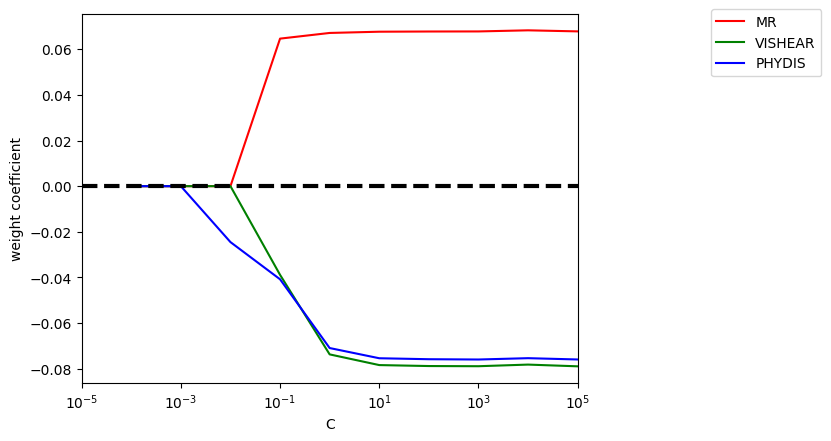

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
         'pink', 'lightgreen', 'lightblue', 
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), 'rgb'):
    plt.plot(params, weights[:, column],
             label=ml_df.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

# Feature Selection and Extraction

In [21]:
# Build SBS algorithm
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# # Ran for 10 min with no result
knn = KNeighborsClassifier(n_neighbors=5)
# sbs = SBS(knn, k_features=1)
# sbs.fit(X_train_std, y_train)

In [24]:
# k_feat = [len(k) for k in sbs.subsets_]
# plt.plot(k_feat, sbs.scores_, marker='o')
# plt.ylim([0.7, 1.02])
# plt.ylabel('Accuracy')
# plt.xlabel('Number of features')
# plt.grid()
# plt.tight_layout()
# plt.show()

In [25]:
# k3 = list(sbs.subsets_[10])
# print(ml_df.columns[1:][k3])

In [26]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9488778527560846
Test accuracy: 0.9191950464396285


# Random Forest Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier

 1) dischargeReason_Not applicable 0.200771
 2) AgedOut                        0.075122
 3) currentPlacementSetting_Runaway 0.071545
 4) caretakerFamilyStructure_Married couple 0.062564
 5) AgeAtStart                     0.046140
 6) raceEthnicity_NH, Am Ind AK Native 0.045400
 7) dischargeReason_Guardianship   0.039186
 8) dischargeReason_Living with other relative(s) 0.035945
 9) dischargeReason_Transfer to another agency 0.026708
10) OutOfStatePlacement_No         0.024875
11) PreviousLOS                    0.024253
12) age2021                        0.021358
13) InAtStart                      0.018249
14) InAtEnd                        0.013884
15) caseGoal_DNG                   0.013588
16) AgeAtLatRem                    0.013133
17) Exited                         0.012918
18) State_Arizona                  0.012332
19) caseGoal_Long-term foster care 0.011918
20) currentPlacementSetting_Group home 0.011791
21) AgeAtEnd                       0.011758
22) SettingLOS                 

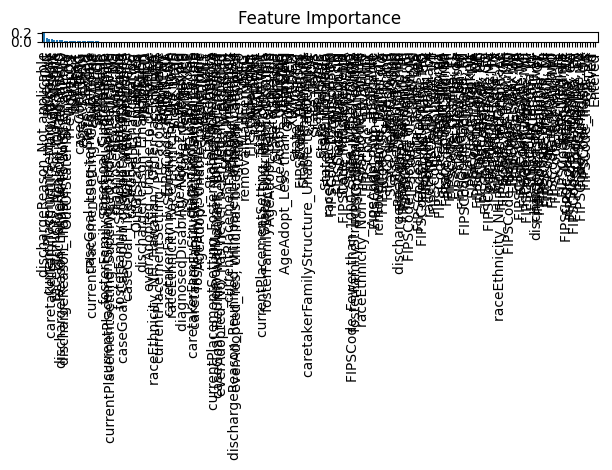

In [31]:
feat_labels = ml_df.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Select From Model

In [32]:
from sklearn.feature_selection import SelectFromModel

In [33]:
sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])

Number of features that meet this threshold criterion: 21


In [34]:
# TODO - need to remove discharge reason from the features, as it is a target variable
# TODO - Should remove exited and in at end
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) dischargeReason_Not applicable 0.200771
 2) AgedOut                        0.075122
 3) currentPlacementSetting_Runaway 0.071545
 4) caretakerFamilyStructure_Married couple 0.062564
 5) AgeAtStart                     0.046140
 6) raceEthnicity_NH, Am Ind AK Native 0.045400
 7) dischargeReason_Guardianship   0.039186
 8) dischargeReason_Living with other relative(s) 0.035945
 9) dischargeReason_Transfer to another agency 0.026708
10) OutOfStatePlacement_No         0.024875
11) PreviousLOS                    0.024253
12) age2021                        0.021358
13) InAtStart                      0.018249
14) InAtEnd                        0.013884
15) caseGoal_DNG                   0.013588
16) AgeAtLatRem                    0.013133
17) Exited                         0.012918
18) State_Arizona                  0.012332
19) caseGoal_Long-term foster care 0.011918
20) currentPlacementSetting_Group home 0.011791
21) AgeAtEnd                       0.011758


In [35]:
X_train

array([[0.0, 0.0, 0.0, ..., False, True, False],
       [0.0, 0.0, 0.0, ..., True, False, False],
       [0.0, 0.0, 0.0, ..., True, False, False],
       ...,
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 0.0, 0.0, ..., True, False, False],
       [0.0, 0.0, 0.0, ..., False, True, False]], dtype=object)

# Chapter 3 - Training for Classification

In [36]:
ml_df

,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,age2021,State_Arizona,State_Arkansas,State_Colorado,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Kentucky,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Mississippi,State_Missouri,State_Nebraska,State_New Hampshire,State_New Jersey,State_New Mexico,State_North Carolina,State_North Dakota,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Puerto Rico,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_West Virginia,State_Wisconsin,State_Wyoming,"FIPSCode_Allegheny, PA","FIPSCode_Allen, IN","FIPSCode_Arapahoe, CO","FIPSCode_Baltimore City, MD","FIPSCode_Bexar, TX","FIPSCode_Brevard, FL","FIPSCode_Bristol, MA","FIPSCode_Broward, FL","FIPSCode_Camden, NJ","FIPSCode_Cook, IL",FIPSCode_DNG,"FIPSCode_Dallas, TX","FIPSCode_Davidson, TN","FIPSCode_De Kalb, GA","FIPSCode_Denver, CO",FIPSCode_District of Columbia,"FIPSCode_Douglas, NE","FIPSCode_Duval, FL","FIPSCode_El Paso, CO","FIPSCode_Escambia, FL","FIPSCode_Essex, MA","FIPSCode_Essex, NJ",FIPSCode_Fewer than 1000 cases in the County,"FIPSCode_Fulton, GA","FIPSCode_Genesee, MI","FIPSCode_Greene, MO","FIPSCode_Hampden, MA","FIPSCode_Harris, TX","FIPSCode_Hillsborough, FL","FIPSCode_Honolulu, HI","FIPSCode_Hudson, NJ","FIPSCode_Ingham, MI","FIPSCode_Jackson, MO","FIPSCode_Jefferson, AL","FIPSCode_Jefferson, CO","FIPSCode_Jefferson, KY","FIPSCode_Kent, MI","FIPSCode_Lake, IN","FIPSCode_Lancaster, NE","FIPSCode_Lane, OR","FIPSCode_Lee, FL","FIPSCode_Macomb, MI","FIPSCode_Maricopa, AZ","FIPSCode_Marion, IN","FIPSCode_Marion, OR","FIPSCode_Mecklenburg, NC","FIPSCode_Miami-Dade, FL","FIPSCode_Middlesex, MA","FIPSCode_Milwaukee, WI","FIPSCode_Multnomah, OR","FIPSCode_Oakland, MI","FIPSCode_Oklahoma, OK","FIPSCode_Orange, FL","FIPSCode_Palm Beach, FL","FIPSCode_Peoria, IL","FIPSCode_Philadelphia, PA","FIPSCode_Pima, AZ","FIPSCode_Pinellas, FL","FIPSCode_Polk, FL","FIPSCode_Providence, RI","FIPSCode_Salt Lake, UT","FIPSCode_San Juan, PR","FIPSCode_Shelby, TN","FIPSCode_St. Louis City, MO","FIPSCode_St. Louis, MO","FIPSCode_Suffolk, MA","FIPSCode_Tarrant, TX","FIPSCode_Travis, TX","FIPSCode_Tulsa, OK","FIPSCode_Union, NJ","FIPSCode_Volusia, FL","FIPSCode_Wayne, MI","FIPSCode_Worcester, MA","FIPSCode_York, PA",Sex_Female,Sex_Male,AgeAdopt_2-5 years old,AgeAdopt_6-12 years old,AgeAdopt_Less than 2 years old,AgeAdopt_Not applicable,AgeAdopt_Unable to determine,AgeAdopt_Unknown,removalManner_DNG,removalManner_Not yet determined,removalManner_Voluntary,"currentPlacementSetting_Foster home, non-relative","currentPlacementSetting_Foster home, relative",currentPlacementSetting_Group home,currentPlacementSetting_Institution,currentPlacementSetting_Pre-adoptive home,currentPlacementSetting_Runaway,currentPlacementSetting_Supervised independent living,currentPlacementSetting_Trial home visit,OutOfStatePlacement_No,OutOfStatePlacement_Yes,caseGoal_Case plan goal not yet established,caseGoal_DNG,caseGoal_Emancipation,caseGoal_Guardianship,caseGoal_Live with other relative(s),caseGoal_Long-term foster care,"caseGoal_Reunify with parent, principal caretaker",caretakerFamilyStructure_Married couple,caretakerFamilyStructure_Single female,caretakerFamilyStructure_Single male,caretakerFamilyStructure_Unable to determine,caretakerFamilyStructure_Unmarried couple,fosterFamilyStructure_Married couple,fosterFamilyStructure_Not applicable,fosterFamilyStructure_Single female,fosterFamilyStructure_Single male,fosterFamilyStructure_Unmarried couple,dischargeReason_Death of child,dischargeRe

In [37]:
X = ml_df[['AgeAtLatRem', 'LifeLOS']].values # only 3 features #, 'FCMntPay', 'HOUSING'
y = ml_df['dischargeReason_Reunified with parent, primary caretaker']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [39]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [67566 83166]
Labels counts in y_train: [47296 58216]
Labels counts in y_test: [20270 24950]


In [40]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
# Train a perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1) # eta0 is the learning rate
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [42]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 13994


In [43]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.69


In [44]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test)) # combines predict and accuracy_score

Accuracy: 0.69


# Plot Decision Regions

In [45]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='green', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_89486/2305942656.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


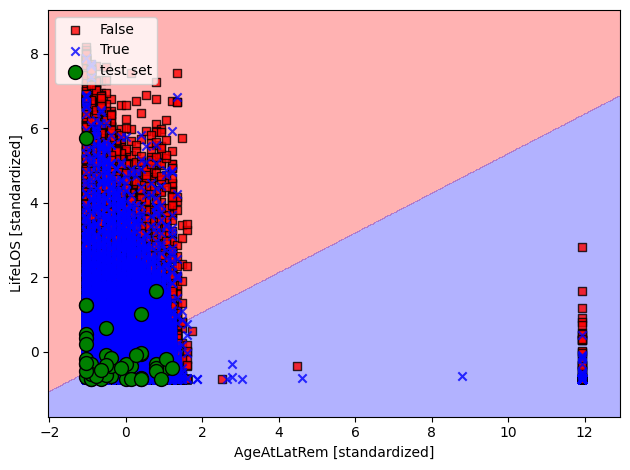

In [51]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                        classifier=ppn, test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.xlabel('AgeAtLatRem [standardized]') # first feature
plt.ylabel('LifeLOS [standardized]') # second feature
plt.tight_layout()
plt.show()

### Logistic Regression and Conditional Proabilities
Generalized Examples

In [52]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

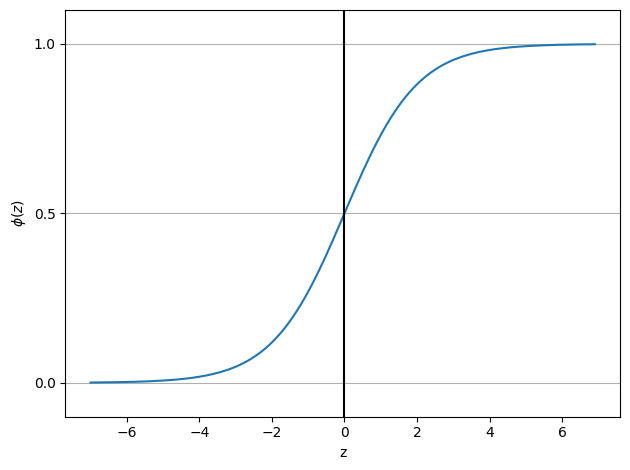

In [53]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [54]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))

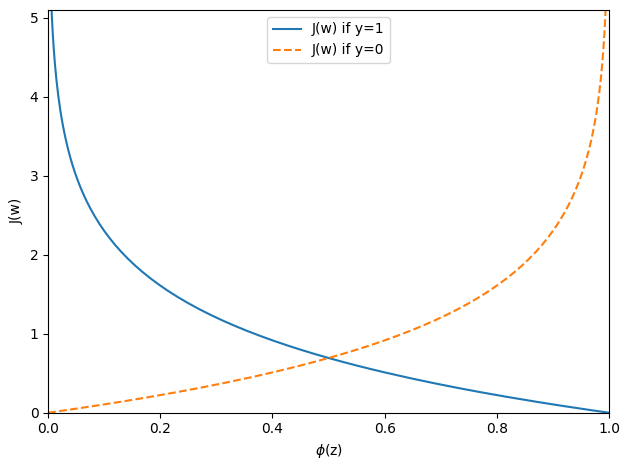

In [55]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_89486/2305942656.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


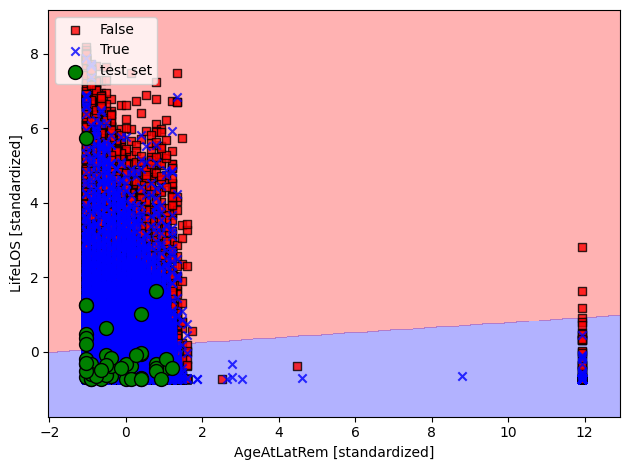

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('AgeAtLatRem [standardized]')
plt.ylabel('LifeLOS [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [57]:
lr.predict_proba(X_test_std[:3, :])

array([[0.58619857, 0.41380143],
       [0.9193302 , 0.0806698 ],
       [0.97318331, 0.02681669]])

Look at the higher value of the two probabilities to determine the class

[1, 0]
[1, 0]
[1, 0]

array([[0.58619857, 0.41380143],
       [0.9193302 , 0.0806698 ],
       [0.97318331, 0.02681669]])

In [58]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([0, 0, 0])

In [59]:
# To predict a single sample, need to reshape it to a 2D array
lr.predict(X_test_std[0, :].reshape(1, -1))

array([False])

## Tackling Overfitting

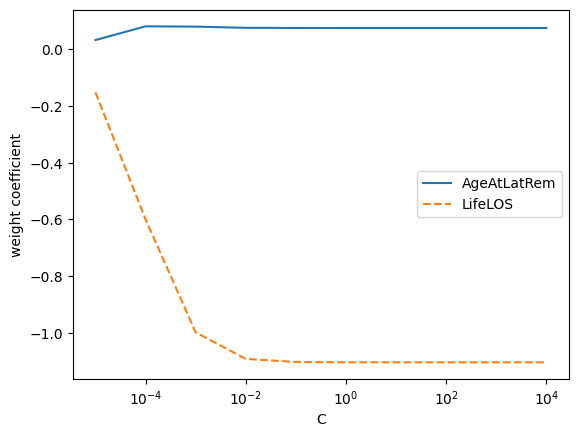

In [60]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='AgeAtLatRem')
plt.plot(params, weights[:, 1], linestyle='--', label='LifeLOS')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log')
plt.show()

### Maximum margin classification with support vector machines

/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_80713/2305942656.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


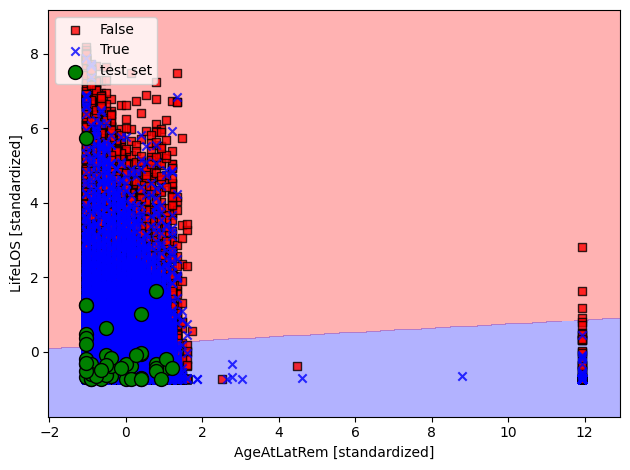

In [58]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('AgeAtLatRem [standardized]')
plt.ylabel('LifeLOS [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Solving nonlinear problems using a kernel SVM

### Generalized Example

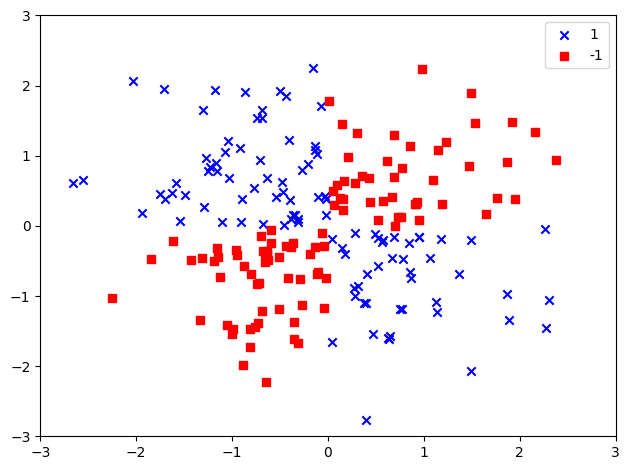

In [62]:
# Linear Inseparable Data using XOR
np.random.seed(0)
X_xor = np.random.randn(200, 2) # RANDOM DATA - NOT FOSTER DATA
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [64]:
# svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
# svm.fit(X_xor, y_xor)
# plot_decision_regions(X_xor, y_xor, classifier=svm)
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
# svm.fit(X_train_std, y_train)
# plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
# plt.xlabel('AgeAtLatRem [standardized]')
# plt.ylabel('LifeLOS [standardized]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# svm = SVC(kernel='rbf', random_state=1, gamma=10, C=1.0)
# svm.fit(X_train_std, y_train)
# plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
# plt.xlabel('AgeAtLatRem [standardized]')
# plt.ylabel('LifeLOS [standardized]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

# Decision Trees

KeyboardInterrupt: 

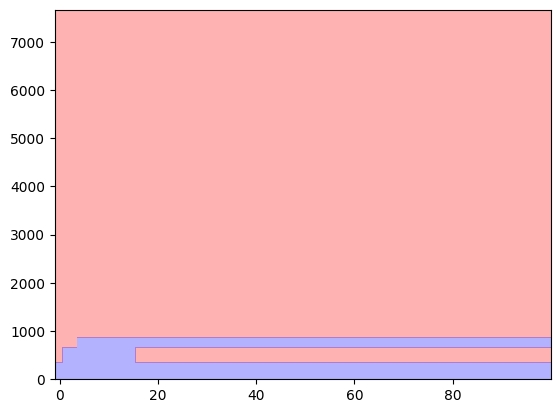

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('AgeAtLatRem')
plt.ylabel('LifeLOS')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import tree
tree.plot_tree(tree_model, filled=True)

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['exited', 'in'],
                           feature_names=['AgeAtLatRem', 'LifeLOS'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('AgeAtLatRem')
plt.ylabel('LifeLOS')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()